## Create bag of words model to determine word frequency, sentence lengths

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/empathyforgiveness/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


(array([461., 271., 370.,  83., 222.,  42.,  29.,   4.,   8.,   5.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

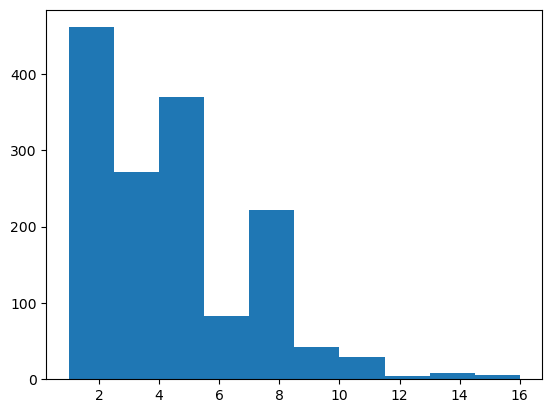

In [7]:
import os
import json
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Tokenizer models need to be downloaded
    # nltk.download('punkt')
    # nltk.download('punkt_tab')

os.chdir('/home/empathyforgiveness/max_website/max-website/my_projects/cnn_fox_articles/pickle_dicts/')

with open('cnn_articles.json') as f:
    cnn_dict = json.load(f)

with open('foxnews_articles.json') as f:
    fox_dict = json.load(f)

text = cnn_dict['Tim Walz’s 2006 campaign falsely described details about his arrest for DWI in 1995 | CNN Politics']
words = word_tokenize(text)
word_lengths = [len(w) for w in words]
plt.hist(word_lengths)

### Tokenize all sentences in cnn db

(array([165., 303., 232., 445., 346., 228., 158., 164., 170., 133., 139.,
        114., 152.,  68.,  67.,  63.,  53.,  44.,  40.,  41.,  34.,  15.,
         14.,  23.,   7.,  13.,  15.,   8.,   2.,   3.,   1.,   0.,   1.,
          0.,   3.,   2.,   0.,   1.,   0.,   1.,   1.,   3.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.  ,  16.78,  31.56,  46.34,  61.12,  75.9 ,  90.68, 105.46,
        120.24, 135.02, 149.8 , 164.58, 179.36, 194.14, 208.92, 223.7 ,
        238.48, 253.26, 268.04, 282.82, 297.6 , 312.38, 327.16, 341.94,
        356.72, 371.5 , 386.28, 401.06, 415.84, 430.62, 445.4 , 460.18,
        474.96, 489.74, 504.52, 519.3 , 534.08, 548.86, 563.64, 578.42,
        593.2 , 607.98, 622.76, 637.54, 652.32, 667.1 , 681.88, 696.66,
        711.44, 726.22, 741.  ]),
 <BarContainer object of 50 artists>)

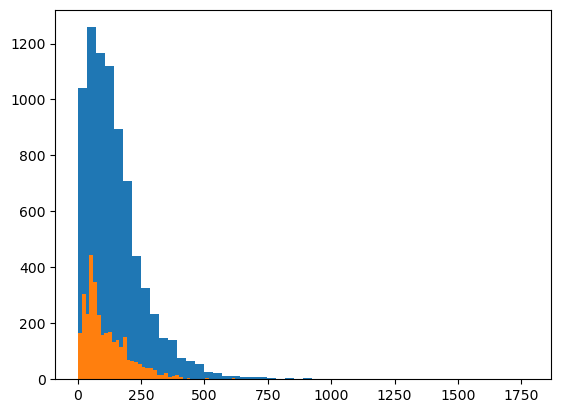

In [9]:
from nltk.tokenize import sent_tokenize

sentence_disribution = []

for k, v in cnn_dict.items():
    text = v
    sentences = sent_tokenize(text)
    sentence_length = [len(s) for s in sentences]
    sentence_disribution.extend(sentence_length)

plt.hist(sentence_disribution, bins=50)

fox_sentence_length = []

for k, v in fox_dict.items():
    text = v
    sentences = sent_tokenize(text)
    sentence_length = [len(s) for s in sentences]
    fox_sentence_length.extend(sentence_length)

plt.hist(fox_sentence_length, bins=50)

7407.923913043478
6171.639344262295


(array([1., 2., 3., 1., 1., 3., 9., 8., 3., 4., 5., 3., 4., 2., 2., 1., 0.,
        2., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1955. ,  2330.9,  2706.8,  3082.7,  3458.6,  3834.5,  4210.4,
         4586.3,  4962.2,  5338.1,  5714. ,  6089.9,  6465.8,  6841.7,
         7217.6,  7593.5,  7969.4,  8345.3,  8721.2,  9097.1,  9473. ,
         9848.9, 10224.8, 10600.7, 10976.6, 11352.5, 11728.4, 12104.3,
        12480.2, 12856.1, 13232. , 13607.9, 13983.8, 14359.7, 14735.6,
        15111.5, 15487.4, 15863.3, 16239.2, 16615.1, 16991. , 17366.9,
        17742.8, 18118.7, 18494.6, 18870.5, 19246.4, 19622.3, 19998.2,
        20374.1, 20750. ]),
 <BarContainer object of 50 artists>)

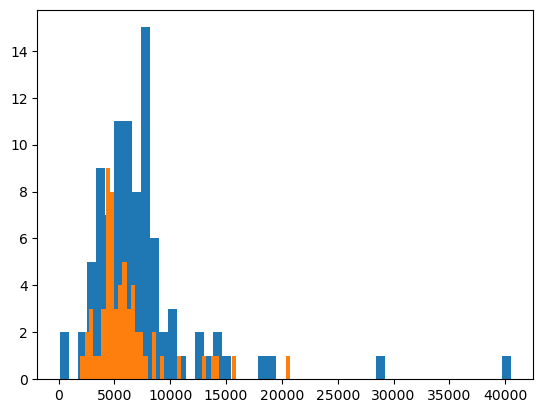

In [12]:
import numpy as np

cnn_article_length = []

for k, v in cnn_dict.items():
    text = v
    a_l = len(text)
    cnn_article_length.append(a_l)

fox_article_length = []

for k, v in fox_dict.items():
    text = v
    a_l = len(text)
    fox_article_length.append(a_l)

# Exclude outliers
cnn_article_length = [a for a in cnn_article_length if a < 60000]
fox_article_length = [a for a in fox_article_length if a < 60000]
print(np.mean(cnn_article_length))
print(np.mean(fox_article_length))

cnn_article_length

plt.hist(cnn_article_length, bins=50)
plt.hist(fox_article_length, bins=50)
